In [42]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv('../LinkedIn_Jobs_Data_Scientist_Mexico.csv')

# EDA Analysis

## General Overview & Descriptive Analysis

### Distribution of Job Postings by Location

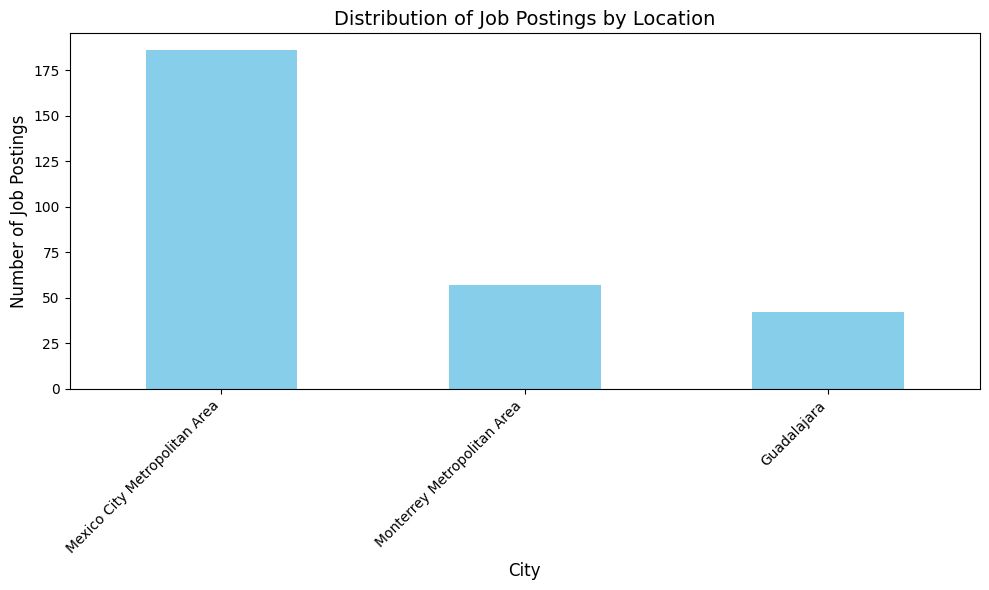

In [44]:
location_counts = df['Location'].value_counts()

plt.figure(figsize=(10, 6))
location_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Job Postings by Location', fontsize=14)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


* The city with the highest number of job postings is Mexico City Metropolitan Area, with 186 postings, indicating it is a major hub for Data Science jobs in Mexico.
* Monterrey Metropolitan Area follows with 57 postings, and Guadalajara has 42 postings.
* These three cities dominate the Data Science job market, making up the majority of job postings in the dataset.

### Distribution of Seniority Levels

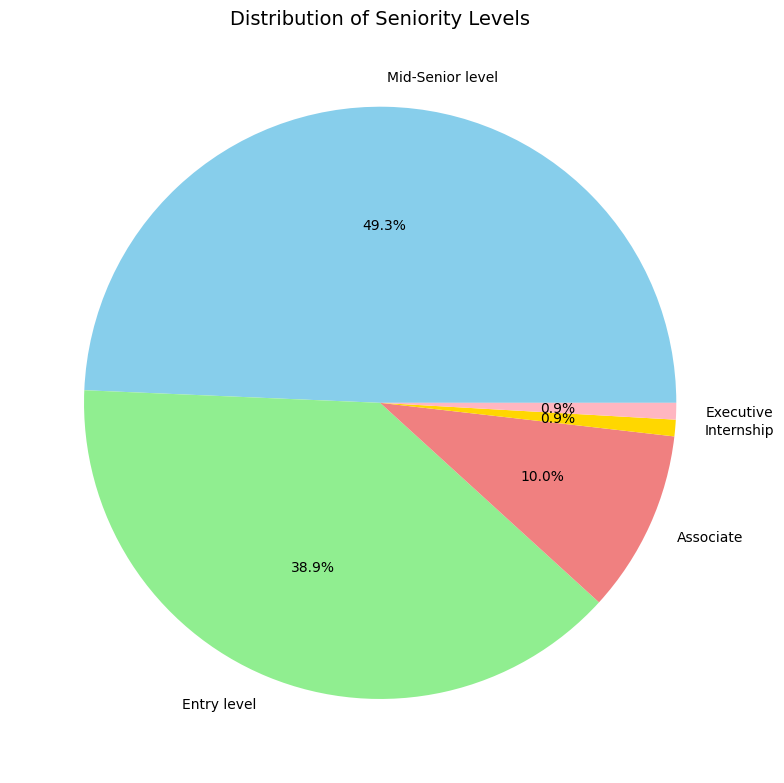

In [45]:
# Group data by seniority level and count the number of job postings per category
seniority_counts = df['SeniorityLevel'].value_counts()

# Plot the distribution of seniority levels as a pie chart
plt.figure(figsize=(8, 8))
seniority_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink'])
plt.title('Distribution of Seniority Levels', fontsize=14)
plt.ylabel('')  # Remove the default ylabel

# Show plot
plt.tight_layout()
plt.show()


* The majority of the postings are for Mid-Senior level positions, accounting for 49.3% of the total job postings.
* Entry-level positions make up 39% of the postings, showing that the market is also open to less experienced candidates.
* Other seniority levels, such as Associate, Executive, and Internship, represent much smaller portions of the job market.

### Employment Type Breakdown

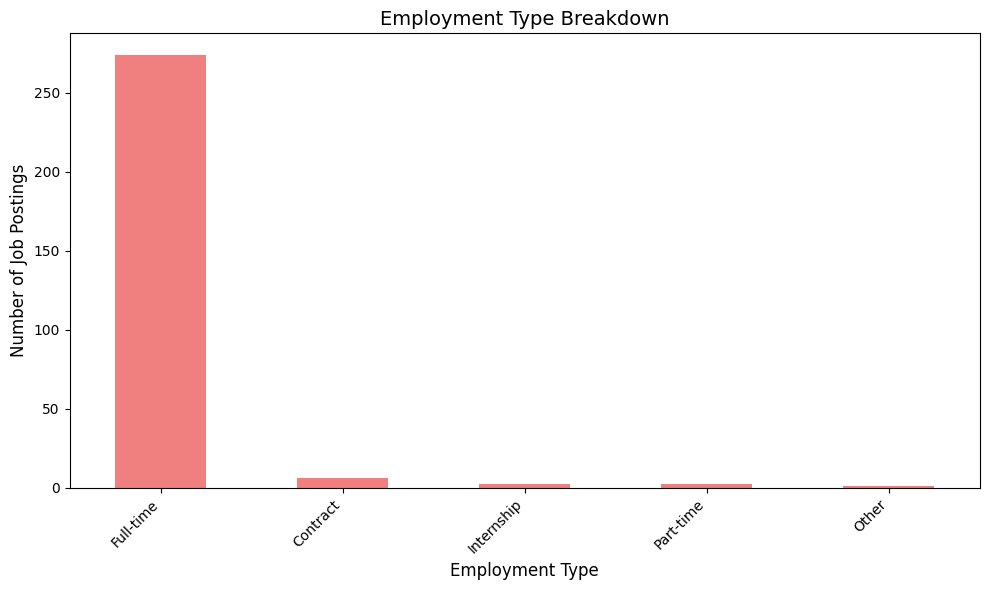

In [46]:
# Group data by employment type and count the number of job postings per category
employment_type_counts = df['EmploymentType'].value_counts()

# Plot the distribution of employment types as a bar chart
plt.figure(figsize=(10, 6))
employment_type_counts.plot(kind='bar', color='lightcoral')
plt.title('Employment Type Breakdown', fontsize=14)
plt.xlabel('Employment Type', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* The vast majority of the job postings (around 97%) are for Full-time positions, making this the most common type of employment contract.
* Very few postings are for Contract or Part-time roles, indicating that the Data Science job market in Mexico heavily favors permanent, full-time positions.

### Top Hiring Companies

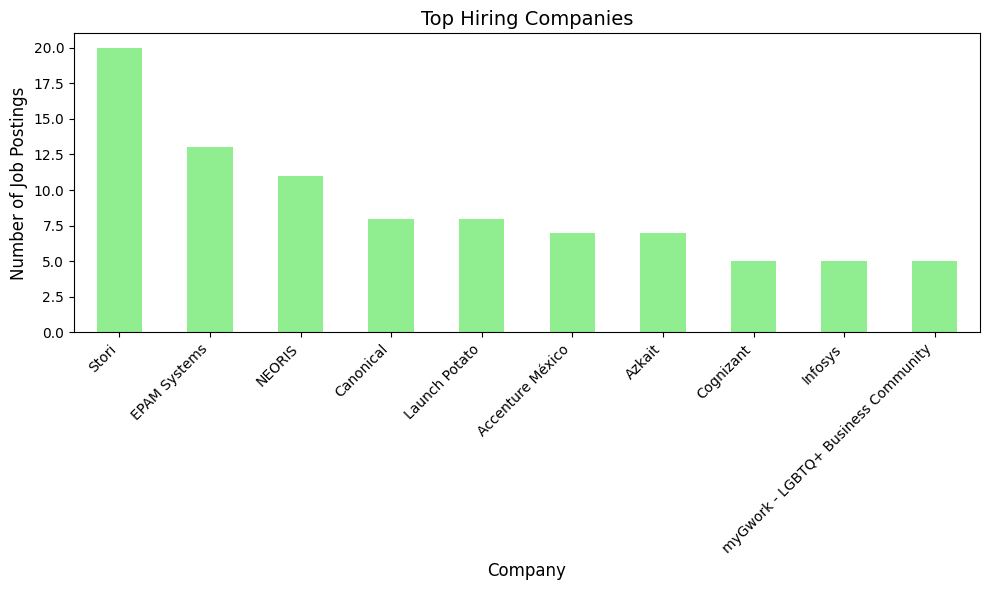

In [47]:
# Group data by company and count the number of job postings per company
company_counts = df['Company'].value_counts().head(10)  # Top 10 companies

# Plot the distribution of top hiring companies as a bar chart
plt.figure(figsize=(10, 6))
company_counts.plot(kind='bar', color='lightgreen')
plt.title('Top Hiring Companies', fontsize=14)
plt.xlabel('Company', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()

* The top hiring companies in the dataset show a concentration of Data Science roles in a few key employers.
* The top 10 companies alone represent a significant portion of the job market, indicating their influence in the Data Science hiring space in Mexico.
* These employers are likely leading the Data Science initiatives within their respective industries.

### Industries Hiring Data Scientists

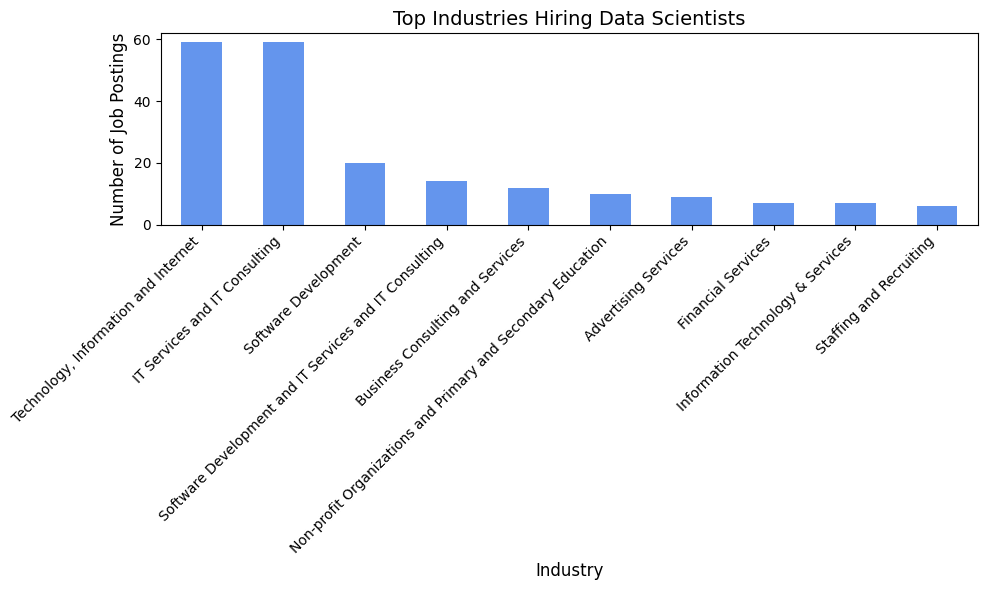

In [48]:
# Group data by industries and count the number of job postings per industry
industry_counts = df['Industries'].value_counts().head(10)  # Top 10 industries

# Plot the distribution of industries as a bar chart
plt.figure(figsize=(10, 6))
industry_counts.plot(kind='bar', color='cornflowerblue')
plt.title('Top Industries Hiring Data Scientists', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* The Technology, Information, and Internet industry and IT Services and IT Consulting dominate Data Science hiring, indicating these sectors are heavily investing in analytics and data-driven solutions.
* Other industries like Software Development and Business Consulting also show significant demand for Data Scientists, reflecting the cross-industry need for data expertise.
* Non-technical sectors like Non-Profit Organizations and Primary and Secondary Education also appear in the top 10, which could indicate the growing influence of data analytics in traditionally non-tech fields.

### Remote vs On-site Jobs

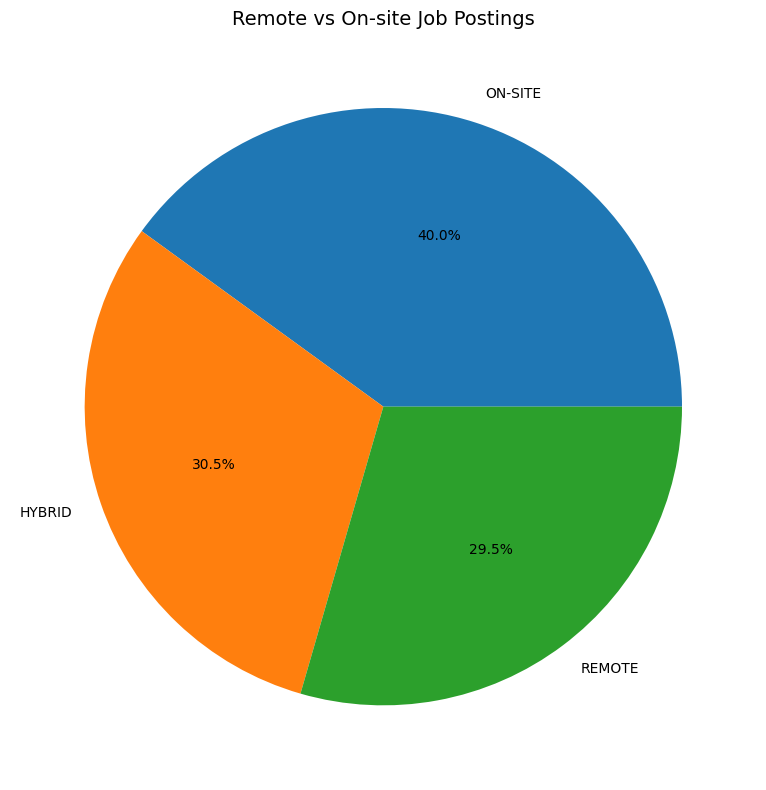

In [49]:
# Group data by remote status and count the number of job postings for remote vs on-site
remote_counts = df['Remote'].value_counts()

# Plot the distribution of remote vs on-site jobs as a pie chart
plt.figure(figsize=(8, 8))
remote_counts.plot(kind='pie', autopct='%1.1f%%', labels=remote_counts.index)
plt.title('Remote vs On-site Job Postings', fontsize=14)
plt.ylabel('')  # Remove the default ylabel for cleaner plot

# Show plot
plt.tight_layout()
plt.show()


* A significant proportion of job postings are remote, indicating that there is substantial flexibility in the Data Science job market in Mexico.
* The presence of on-site roles remains strong, but the rise of remote work is clearly evident, especially post-pandemic, where companies are embracing remote models for Data Science roles.

### Job Postings Over Time

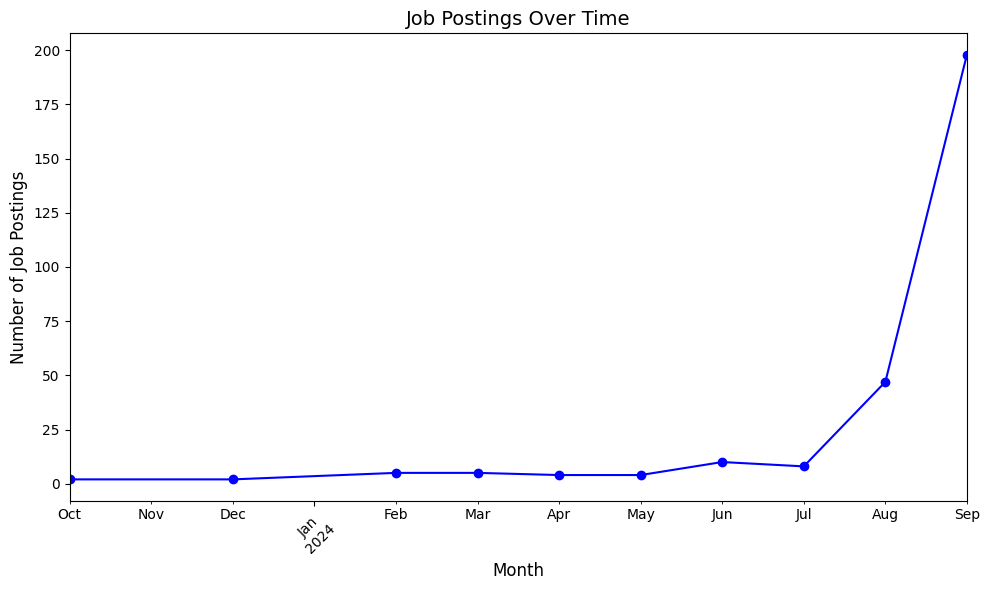

In [50]:
# Convert 'DatePosted' to datetime format
df['DatePosted'] = pd.to_datetime(df['DatePosted'], errors='coerce')

# Extract the month and year from the 'DatePosted' column
df['YearMonth'] = df['DatePosted'].dt.to_period('M')

# Group by the year and month, and count the number of job postings per period
monthly_postings = df.groupby('YearMonth').size()

# Plot the trend of job postings over time as a line graph
plt.figure(figsize=(10, 6))
monthly_postings.plot(kind='line', marker='o', color='blue')
plt.title('Job Postings Over Time', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Job Postings', fontsize=12)
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

* The line graph shows clear trends in job posting activity over time.
* There are periods of higher activity (such as the middle of 2024) where job postings increased significantly.
* Certain months see a drop in job postings, which may reflect seasonal trends or specific events impacting the job market.

## Skillset and Technology Trends

### Top Skills for Data Science Jobs

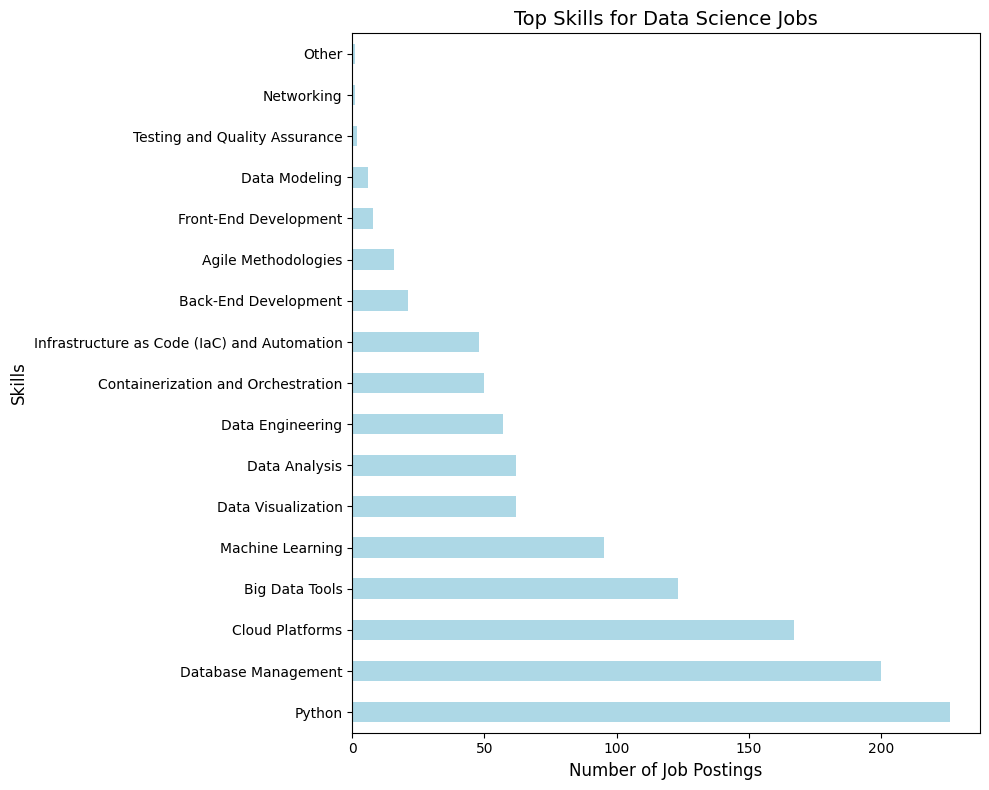

In [51]:
# List of skill columns to analyze
skill_columns = [
    'Agile Methodologies', 'Back-End Development', 'Big Data Tools', 'Cloud Platforms',
    'Containerization and Orchestration', 'Data Analysis', 'Data Engineering',
    'Data Modeling', 'Data Visualization', 'Database Management',
    'Front-End Development', 'Infrastructure as Code (IaC) and Automation',
    'Machine Learning', 'Networking', 'Python', 'Testing and Quality Assurance', 'Other'
]

# Sum up the occurrences of each skill in job postings
skills_summary = df[skill_columns].sum().sort_values(ascending=False)

# Plot the distribution of top requested skills as a horizontal bar chart
plt.figure(figsize=(10, 8))
skills_summary.plot(kind='barh', color='lightblue')
plt.title('Top Skills for Data Science Jobs', fontsize=14)
plt.xlabel('Number of Job Postings', fontsize=12)
plt.ylabel('Skills', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


* Python is the most in-demand skill, appearing in the majority of job postings, which is unsurprising given its central role in Data Science.
* Other key skills include Database Management, Cloud Platforms, and Big Data Tools, indicating a strong demand for data management and cloud computing expertise.
* Skills like Machine Learning and Data Visualization are also highly sought after, underscoring the focus on building models and communicating insights in Data Science roles.

### Tech Stack Analysis

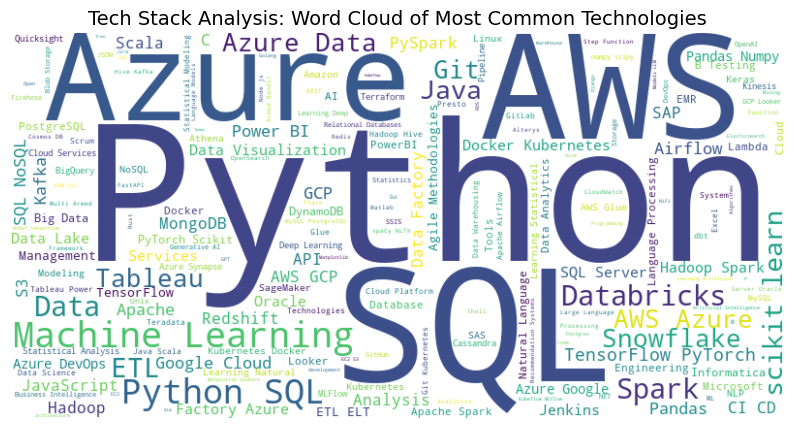

In [52]:
# Import the WordCloud library to generate a word cloud
from wordcloud import WordCloud

# Combine all the tech stacks into one string
tech_stack_text = " ".join(df['TechStack'].dropna())

# Generate a word cloud for the tech stack column
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(tech_stack_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Tech Stack Analysis: Word Cloud of Most Common Technologies', fontsize=14)
plt.show()


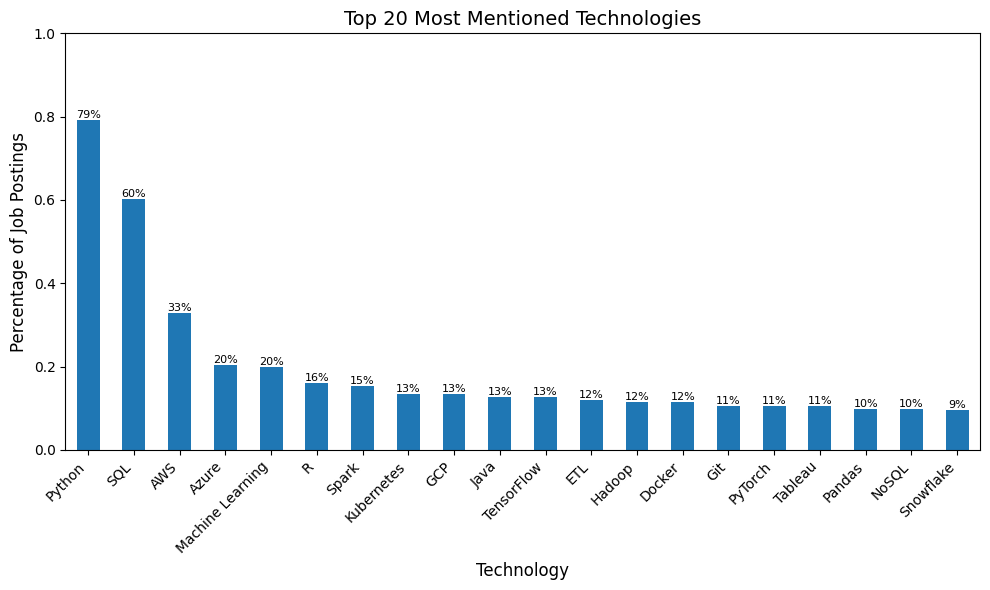

In [60]:
# Split the TechStack column by commas and count the occurrences of each technology
tech_stack_series = df['TechStack'].dropna().str.split(',').explode().str.strip()
# Count the occurrences of each technology
tech_stack_counts = tech_stack_series.value_counts().head(20)
# Normalize the counts by dividing by the total number of job postings
tech_stack_normalized = tech_stack_counts / len(df)

# Plot the normalized top 10 most mentioned technologies as a bar chart
plt.figure(figsize=(10, 6))
bars = tech_stack_normalized.plot(kind='bar')
plt.title('Top 20 Most Mentioned Technologies', fontsize=14)
plt.xlabel('Technology', fontsize=12)
plt.ylabel('Percentage of Job Postings', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add percentage labels on top of each bar
for bar in bars.patches:
    bars.annotate(format(bar.get_height(), '.0%'), 
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                  ha='center', va='bottom', fontsize=8)

# Show plot
plt.tight_layout()
plt.show()


* The word cloud visualization shows the most frequent technologies mentioned across job postings, with larger words representing more common technologies.
* Common technologies like Python, SQL, and AWS (Amazon Web Services) are prominent, highlighting the demand for these tools and platforms in the Data Science market.
* Other technologies such as Tableau, Azure, and Docker are also frequently mentioned, indicating their importance in the tech stack for Data Science roles.

### Correlation Between Seniority and Skills

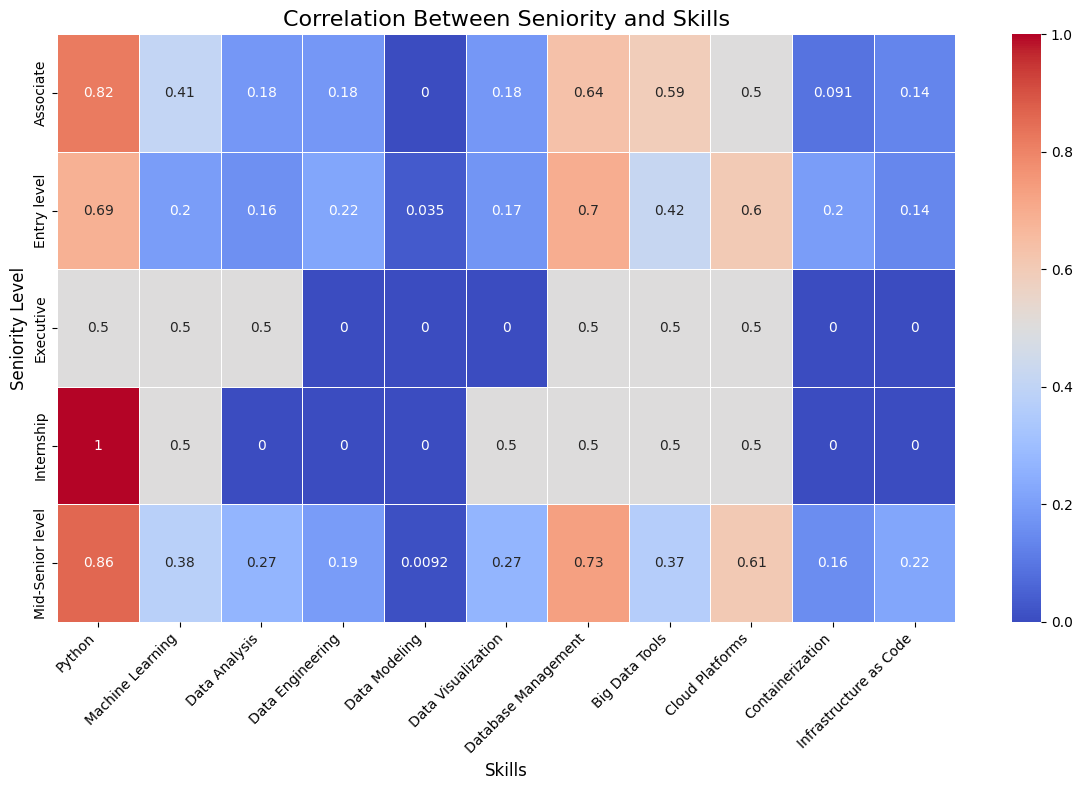

In [66]:
import seaborn as sns

skill_columns_heatmap = [
    'Python', 'Machine Learning','Data Analysis', 'Data Engineering',
    'Data Modeling', 'Data Visualization', 'Database Management',
    'Big Data Tools', 'Cloud Platforms',
    'Containerization and Orchestration',
    'Infrastructure as Code (IaC) and Automation',
     
]

# Filter out job postings with a SeniorityLevel and skill columns
seniority_skills_df = df[['SeniorityLevel'] + skill_columns_heatmap].dropna()

seniority_skills_df.rename(columns={
    'Containerization and Orchestration': 'Containerization',
    'Infrastructure as Code (IaC) and Automation': 'Infrastructure as Code'
}, inplace=True)

# Group by SeniorityLevel and calculate the mean of each skill
skills_by_seniority = seniority_skills_df.groupby('SeniorityLevel').mean()

# Plot a heatmap of skills vs. seniority levels
plt.figure(figsize=(12, 8))
sns.heatmap(skills_by_seniority, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Seniority and Skills', fontsize=16)
plt.xlabel('Skills', fontsize=12)
plt.ylabel('Seniority Level', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Show plot
plt.tight_layout()
plt.show()


* The heatmap shows the correlation between seniority levels and the required skills for Data Science jobs.
* Python, Cloud Platforms, and Machine Learning are essential skills across all seniority levels.

### Skill Frequency in Different Industries

### Skills by Location

### Cloud Technologies in Demand

### Data Science vs. Data Engineering Skills

### Evolution of Machine Learning Job Postings Over Time

### Agile Methodologies and Seniority Levels

## Applicant Analysis

### Average Number of Applicants per Job Posting

### Applicants by Location

### Applicants and Seniority Level

### Correlation Between Number of Applicants and Skills Required

### Number of Applicants Over Time

### Applicants for Remote Jobs vs. On-site Jobs

## Location-Based Analysis

### Top Cities for Remote Jobs

### Remote Job Postings Over Time

### Skill Demand by Location

### Seniority Level by Location

### Job Function Breakdown by Location

### Job Market Concentration

### Comparison of Job Postings by City Over Time

## Textual Data and Description Analysis

### Job Title Word Cloud

### Job Description Length Analysis

### Keyword Frequency in Job Descriptions

### Text Sentiment Analysis on Job Descriptions

## Time-Series and Trend Analysis

### Postings Over Time by Industry

### Seasonality in Job Postings

### Postings Growth Rate

### New vs. Repeated Job Postings

## Advanced Statistical Analysis

### Correlation Between Job Functions and Skills

### Cluster Analysis on Job Postings

### Principal Component Analysis (PCA) on Skills

### Regression Analysis to Predict Number of Applicants

### Factor Analysis on Industry vs. Skills

### Survival Analysis for Job Postings

### Logistic Regression to Predict Remote Jobs

### Time-Series Forecasting of Job Postings

### ANOVA to Compare Skills Across Seniority Levels

### Chi-Square Test for Industry vs. Employment Type

### Multiple Correspondence Analysis (MCA) on Categorical Data

### Latent Class Analysis (LCA) to Segment Job Postings